# 1. 논리 게이트
- 0(거짓)과 1(참)을 입력받아 특정한 규칙에 따라 출력을 내는 기본 연산 장치

## 1-1. AND 게이트
- 입력이 모두 1일 때만 1

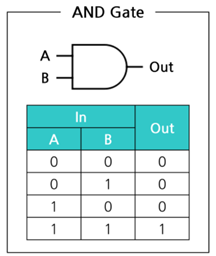

In [1]:
import numpy as np

In [2]:
def AND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = x[0]*w[0] + x[1]*w[1] + b #0.5*x1 + 0.5*x2 + (-0.7)

    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
AND(1,1), AND(0,0), AND(1,0), AND(0,1)

(1, 0, 0, 0)

## 1-2. NAND 게이트
- 두 입력이 모두 1일 때만 0

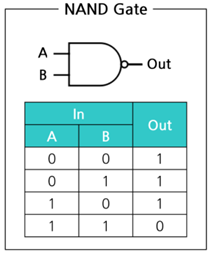

In [4]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = x[0]*w[0] + x[1]*w[1] + b

    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
NAND(1,1), NAND(0,0), NAND(1,0), NAND(0,1)

(0, 1, 1, 1)

## 1-3. OR 게이트

- 입력 중 하나라도 1이면 1

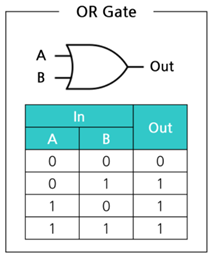

In [7]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = x[0]*w[0] + x[1]*w[1] + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
OR(1,1), OR(0,0), OR(1,0), OR(0,1)

(1, 0, 1, 1)

## 1-4. XOR 게이트

- 두 입력이 다를 때만 1

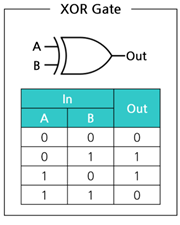

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [10]:
XOR(0,0), XOR(1,0), XOR(1,1)

(0, 1, 0)

# 2. DNN(Deep Neural Network)

## 2-1. 단층 퍼셉트론의 한계
- 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트를 구현할 수 있으나 XOR 게이트는 구현할 수 없음
- 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능(이진 분류기)

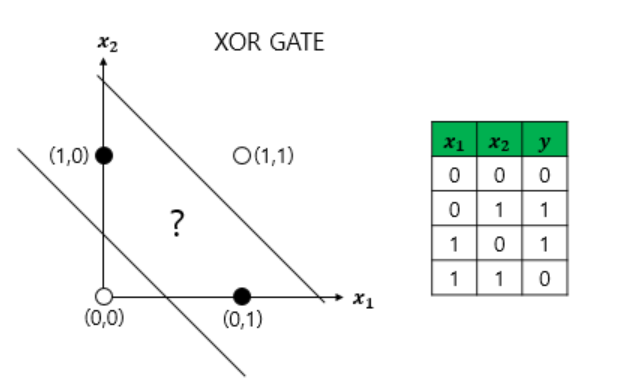

## 2-2. DNN
- XOR 게이트는 기존의 AND, NAND, OR 게이트의 조합

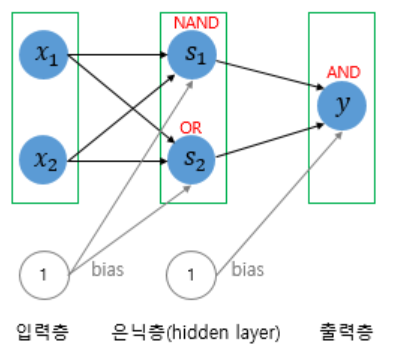

- 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론(MultiLayer Perceptron, MLP)은 중간에 층을 더 추가
- 은닉층(hidden layer): 입력층과 출력층 사이에 존재하는 층
- 심층 신경망(Deep Neural Network, DNN): 은닉층이 2개 이상인 신경망

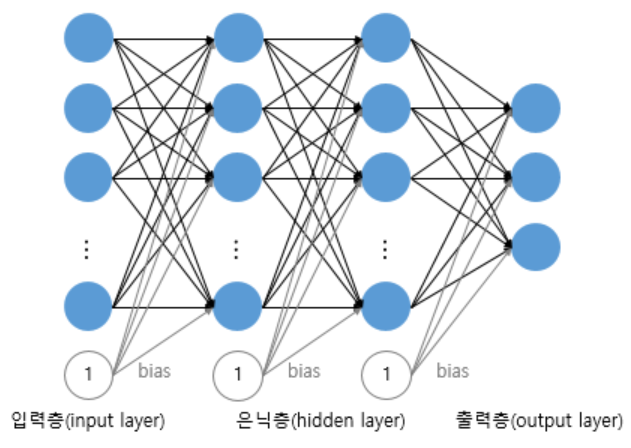

## 2-3. DNN 실습

###Boston Housing
- 보스턴 주택 가격 : 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리함
- 보스턴 시의 주택 가격에 대한 데이터로 여러 개의 측정지표들 (예를 들어, 범죄율, 학생/교사 비율 등) 13개를 독립변수로 포함하고, 보스턴 인근의 주택 가격의 중앙값(median value) 1개를 종속변수로 하여 총 14개의 변수로 구성

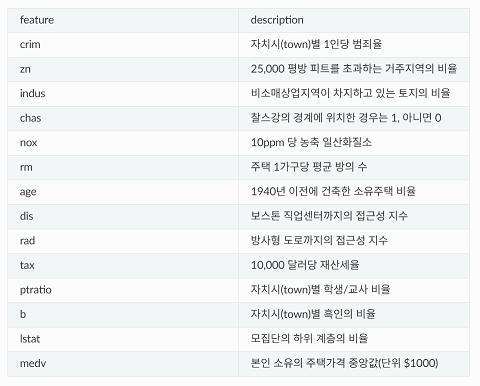

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets

In [15]:
# Boston Housing 데이터 불러오기
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

print("훈련 데이터:", x_train.shape, y_train.shape)  # (404, 13), (404,)
print("테스트 데이터:", x_test.shape, y_test.shape)  # (102, 13), (102,)

# 스케일링 (특징 정규화)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터: (404, 13) (404,)
테스트 데이터: (102, 13) (102,)


In [16]:
# DNN 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_dim=13),  #(output 차원, activation(활성화함수), input 차원) 13개의 입력 특성
    Dense(32, activation='relu'),
    Dense(1)  # 회귀(최종 output 개수/차원)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 학습
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)

# 평가
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print("Boston Housing Test MAE:", mae)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 531.1749 - mae: 21.2394
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 471.3710 - mae: 19.8708  
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 350.0791 - mae: 16.7999 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183.4981 - mae: 11.5082 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.0398 - mae: 6.4180 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.5005 - mae: 5.0618 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.8042 - mae: 4.1652 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.9997 - mae: 3.7170
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0660 - mae: 3.3255 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8546 - mae: 3.2478 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1698 - mae: 3.0978 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8440 - mae: 3.2796 
Epoch 

### MNIST
- 손글씨 숫자 이미지들이 모여있는 데이터

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [13]:
# MNIST 데이터 불러오기 & shape 확인
# ------------- complete the code ---------------------
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
print("훈련 세트:", x_train.shape, y_train.shape) # 6000장, 28x28 크기, 흑백 이미지
print("테스트 세트:", x_test.shape, y_test.shape) # 1000장, 28x28 크기, 흑백 이미지
# ------------- complete the code ---------------------

# 정규화 (0~1 범위)
x_train = x_train / 255.0
x_test = x_test / 255.0

훈련 세트: (60000, 28, 28) (60000,)
테스트 세트: (10000, 28, 28) (10000,)


In [14]:
# DNN 모델
model = Sequential([
    Flatten(input_shape=(28, 28)),   # 28x28 → 784 벡터
 # ------------- complete the code ---------------------
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
 # ------------- complete the code ---------------------
    Dense(10, activation='softmax')  # 10개의 클래스 (0~9)
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 학습
# parameter : epoch 5, batch_size 128
# ------------- complete the code ------------------------------
# 학습
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)
# ------------- complete the code ------------------------------

# 평가
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("MNIST 분류 정확도:", acc)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8228 - loss: 0.6182
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9560 - loss: 0.1477
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9706 - loss: 0.0982
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9773 - loss: 0.0727
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9825 - loss: 0.0555
MNIST 분류 정확도: 0.968999981880188
